In [5]:
import pandas as pd
import geopandas as gpd

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["font.size"] = 16

<AxesSubplot:>

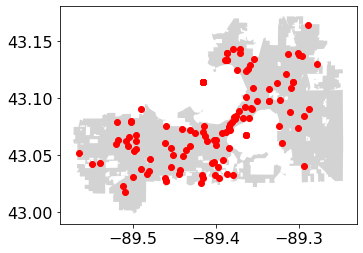

In [16]:
city = gpd.read_file("zip://city.zip")
events = gpd.read_file("events.shp")
events = events.dropna() # loses 17/140
events["Date"] = pd.to_datetime(events["Date"])
events = events.sort_values(by="Date")

ax = city.plot(color="lightgray")
events.plot(color="red", ax=ax)

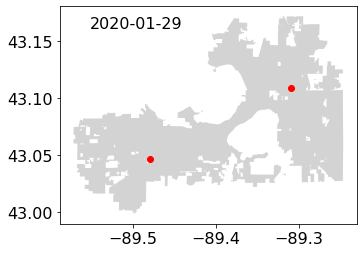

In [46]:
fig, ax = plt.subplots()

def draw_frame(frame_num):
    ax.cla()
    week_num = frame_num
    start = pd.Timestamp(2020, 1, 1) + pd.Timedelta(days=7*week_num)
    end = pd.Timestamp(2020, 1, 1) + pd.Timedelta(days=7*(week_num+1))
    week = events[(events["Date"] >= start) & (events["Date"] < end)]

    city.plot(color="lightgray", ax=ax)
    if len(week) > 0:
        week.plot(color="red", ax=ax)
    ax.text(0.1, 0.9, str(start).split()[0], transform=ax.transAxes)
    
draw_frame(4)

In [47]:
fig, ax = plt.subplots()

anim = FuncAnimation(fig, draw_frame, frames=52)
vid = anim.to_html5_video()
plt.close(fig)

In [48]:
from IPython.core.display import HTML
HTML(vid)